# Exercice Régression Linéaire

Pour notre premier exercice de régression linéaire, on va créer un modèle simple qui prévoit la température à partir de l'humidité. 

## Lecture des données

On commence par lire les données à partir d'un fichier. 

- lire le fichier "*weather.csv*" (disponible sur [http://www.kirschpm.fr/cours/PythonDataScience/files/](http://www.kirschpm.fr/cours/PythonDataScience/files/weather.csv) ) avec l'opération ***read_csv***
- afficher les informations sur le DataFrame créé (opération ***info***)
- affichier les premières lignes du DataFrame (opération ***head***)


In [23]:
import pandas as pnd

df_weather = pnd.read_csv('http://www.kirschpm.fr/cours/PythonDataScience/files/weather.csv')

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [24]:
df_weather.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split (df_weather, test_size=0.33, random_state=42)

print (df_train.shape, df_test.shape)
df_train.head(5)

(6700, 8) (3300, 8)


,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
8371,11.044444,0.67,15.1984,149,9.9820,1026.72,1,Normal
5027,23.961111,0.47,8.3076,142,9.9820,1018.97,1,Warm
9234,-1.250000,0.92,10.9641,202,4.0089,1032.08,0,Cold
3944,12.222222,0.47,20.3021,271,10.2557,1014.61,1,Normal
6862,-1.227778,1.00,7.8890,102,2.9624,1019.31,0,Cold


## Séparer les données de training et de test

On va utiliser une seule **feature** (***Humidity***) pour trouver notre **target** (***Temperature_c***). 

- créer deux listes, une contenant les noms des colonnes features, et une pour le nom de colonne target
- A partir des données de *training* (***df_train***), créer un DataFrame ***x_train*** avec les valeurs des features et un DataFrame ***y_train*** avec les valeurs de target
- Faire la même chose pour les données de test (créer un ***x_test*** et un ***y_test*** à partir de ***df_test***). 


In [4]:
feature_names = ['Humidity']
target = ['Temperature_c'] 

In [5]:
x_train = df_train[feature_names]
y_train = df_train[target]

x_train.describe()

,Humidity
count,6700.000000
mean,0.734115
std,0.196582
min,0.000000
25%,0.600000
50%,0.780000
75%,0.900000
max,1.000000


In [6]:
x_test = df_test[feature_names]
y_test = df_test[target]

x_test.describe()

,Humidity
count,3300.000000
mean,0.737621
std,0.193286
min,0.150000
25%,0.610000
50%,0.780000
75%,0.890000
max,1.000000


## Entrainer le modèle

- Créer un nouveau modèle de **régression linéaire**  
- Entrainer le modèle avec les données de test
- Observer les valeurs des attributs ***intercept_*** et ***coef_***

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [8]:
intercept = model.intercept_
coeffs = model.coef_

print ('intercept :', intercept, 'Coefficients :', coeffs)

print ('Formule :')
print('Temperature = ', intercept, '+' ,  coeffs[0], 'x Humidity')

intercept : [34.57484017] Coefficients : [[-30.88864271]]
Formule :
Temperature =  [34.57484017] + [-30.88864271] x Humidity


## Tester le modèle

Une fois créé et entrainé, il faut désormais tester le modèle afin d'évaluer sa performance. 

- Tester le modèle avec les données de test
- Visualiser les données prédites et atttendues

In [9]:
y_pred = model.predict(x_test)

In [10]:
visu = pnd.DataFrame(y_test[target])
visu['Predicted'] = y_pred
visu['Humidity'] = x_test[feature_names]
visu.rename(columns={'Temperature_c':'Expected'}, inplace=True)
visu.head()

,Expected,Predicted,Humidity
6252,-2.727778,18.821632,0.51
4684,11.094444,8.010607,0.86
1731,1.122222,7.392835,0.88
4742,-2.850000,14.806109,0.64
4521,7.777778,4.921743,0.96


<AxesSubplot:title={'center':'Predicted'}, xlabel='Humidity'>

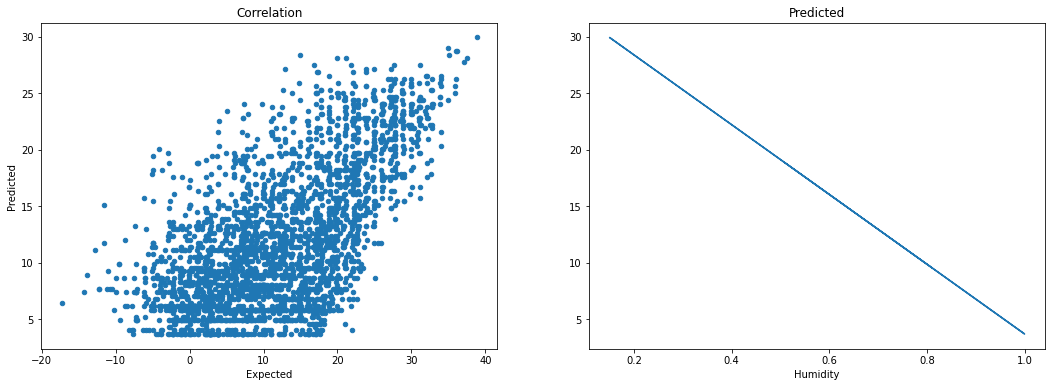

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

visu.plot.scatter(x='Expected', y='Predicted', title='Correlation', ax=axs[0])
visu.set_index('Humidity')['Predicted'].plot(title='Predicted', kind='line', ax=axs[1])

## Evaluer le modèle

Afin évaluer le modèle, on va comparer les données obtenues (prévues) avec celles attendues à travers différentes métriques. 

- évaluer le modèle à l'aide des métriques MAE, MSE et RMSE
- évaluer le modèle à l'aide de la métrique *explained variance*
- afficher les résultats obtenues par ces métriques

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

expvar = explained_variance_score(y_test, y_pred)

print ('MAE={:.3f}'.format(mae) )
print ('RMSE={0:.3f} \t MSE={1:.3f} '.format(rmse, mse) )
print ('Explained Variance={:.3f}'.format(expvar) )

MAE=6.006
RMSE=7.319 	 MSE=53.564 
Explained Variance=0.385


# Exercice Régression Linéaire - variables multiples

Maintenant qu'on maitrise les étapes pour la construction et l'évaluation du modèle, on peut l'améliorer en ajoutant des nouvelles variables (*features*) disponibles dans les données de base. 


In [13]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


## Encoding 

Les données contiennent une colonne de type ***object*** (autrement dit, qui ne contient pas des chiffres). Il faut donc la convertir en valeur numériques, ce qu'on appelle ***encoding***. 

Différents types d'encodeurs existent. On va utiliser un encodeur de type ***One Hot*** proposé par la classe ***DataFrame*** de la bibliothèque ***Pandas***. 

- afficher les catégories présentes dans la colonne "*Description*"
- encoder ces catégories à l'aide de l'encodeur ***get_dummies***
- afficher les premières lignes du DataFrame obtenu
- afficher les informations sur ce DataFrame


In [14]:
df_weather.value_counts(df_weather['Description'])

Description
Normal    4992
Warm      2507
Cold      2501
dtype: int64

In [15]:
df_dummies = pnd.get_dummies ( df_weather, drop_first=True )
df_dummies.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,0,0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,0,1
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,1,0
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,0,0
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,0,0


In [16]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description_Normal    10000 non-null  uint8  
 8   Description_Warm      10000 non-null  uint8  
dtypes: float64(5), int64(2), uint8(2)
memory usage: 566.5 KB


## Séparation training et test sets

On va refaire la séparation entre training et test à partir de notre nouveau DataFrame ***df_dummies***.
- faire la séparation entre training et test du DataFrame ***df_dummies***
- prendre comme Y (**y_train** et **y_test**) la colonne "*Temperature_c*"
- pour le X (**x_train** et **x_test**), supprimer simplement la colonne "*Temperature_c*" du DataFrame ***df_dummies***


In [17]:
df_train, df_test = train_test_split (df_dummies, test_size=0.33, random_state=42)

print (df_train.shape, df_test.shape)

(6700, 9) (3300, 9)


In [18]:
y_train = df_train[ ['Temperature_c'] ]
x_train = df_train.drop(['Temperature_c'], axis='columns')
x_train.head()

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
8371,0.67,15.1984,149,9.9820,1026.72,1,1,0
5027,0.47,8.3076,142,9.9820,1018.97,1,0,1
9234,0.92,10.9641,202,4.0089,1032.08,0,0,0
3944,0.47,20.3021,271,10.2557,1014.61,1,1,0
6862,1.00,7.8890,102,2.9624,1019.31,0,0,0


In [19]:
y_test = df_test[ ['Temperature_c'] ]
x_test = df_test.drop(['Temperature_c'], axis='columns')
x_test.head()

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
6252,0.51,25.2287,2,11.4471,1036.09,0,0,0
4684,0.86,3.7030,283,9.9820,1017.35,1,1,0
1731,0.88,12.1877,167,4.9105,1020.45,1,0,0
4742,0.64,10.4489,11,9.9820,1028.93,0,0,0
4521,0.96,6.4400,180,3.0590,999.00,1,1,0


## Création et Entrainement nouveau modèle

- créer et entrainer un nouveau modèle de régression linéaire
- afficher les valeurs des attributs "***intercept_***" et "***coef_***"


In [20]:
model_full = LinearRegression()

model_full.fit(x_train, y_train)

print ( 'Intercept :', model_full.intercept_)
print ( 'Coefficients :', model_full.coef_)

Intercept : [3.64494053]
Coefficients : [[-8.12735036e+00 -7.16582510e-02  1.13431836e-03  5.47996684e-02
   7.55608339e-05  5.67566186e+00  8.48376238e+00  1.91937072e+01]]


In [21]:
liste_coeffs = model_full.coef_.ravel()
for i,coef in enumerate (liste_coeffs) :
    print (x_train.columns[i], ":", coef)

Humidity : -8.127350361370146
Wind_Speed_kmh : -0.07165825096198786
Wind_Bearing_degrees : 0.001134318363874065
Visibility_km : 0.05479966838317574
Pressure_millibars : 7.556083387605383e-05
Rain : 5.675661864415513
Description_Normal : 8.483762375845334
Description_Warm : 19.193707204046515


## Tester et Evaluer le modèle
- Utiliser les données de test pour tester le modèle
- évaluer les valeurs obtenues avec les métriques MSA, MSE et RMSE, et *explained variance*

In [22]:
y_pred_full = model_full.predict (x_test)

mae_full = mean_absolute_error(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
rmse_full = sqrt(mse_full)
var_full = explained_variance_score(y_test, y_pred_full)

print ('MAE = {:.3f}'.format(mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(rmse_full, mse_full) )
print ('Explained Variance = {:.3f}'.format(var_full))

MAE = 2.848
RMSE = 3.491 	 MSE = 12.187 
Explained Variance = 0.860
